# Statistical Learning
- [1. Polynomial Regression](#1.-Polynomial-Regression)
  - [Data Generation](#Data-Generation)
  - [Model fitting](#Model-fitting)
  - [Model averaging](#Model-averaging)
  - [Bias Variance Tradeoff](#Bias-Variance-Tradeoff)
- [2. K Nearest Neighbor Classification](#2.-K-Nearest-Neighbor-Classification)
  - [Import Necessary Libraries](#Import-Necessary-Libraries)
  - [Part 1: Human Activity Recognition dataset](#Part-1:-Human-Activity-Recognition-dataset)
  - [Part 2: IRIS dataset](#Part-2:-IRIS-dataset)

# 1. Polynomial Regression

In [2]:
import pylab as pl
import numpy as np
from numpy.linalg import norm
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline
plt.style.use('seaborn-white')

## Data Generation

First we will write a function to generate a random sample. The data generation model is the following:

$$Y = f(x) + \epsilon$$

1. with $f(x) = 2sin(1.5x)$ and $\epsilon\sim\mathcal{N}(0,1)$
2. with $f(x) = \frac{1}{3}x^3-2x^2+3x$ and $\epsilon\sim\mathcal{N}(0,1)$
3. ?

In [3]:
def f(num_samples):
    '''
    Returns a sample with 'num_samples' instances without noise.
    '''
    x = np.linspace(0, 4.5, num_samples)
    y = 2*np.sin(1.5*x)
    return x, y

def sample(num_samples):
    '''
    Returns a sample with 'num_samples' instances.
    '''
    x = np.linspace(0, 4.5, num_samples)
    y = 2*np.sin(1.5*x) + pl.randn(x.size)
    return x, y

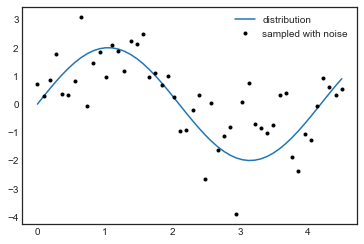

In [4]:
x_ideal, y_ideal = f(50)
x, y = sample(50)

pl.figure()
plt.plot(x_ideal, y_ideal, label='distribution')
plt.plot(x, y, 'k.', label='sampled with noise')
plt.legend()
plt.show()

## Model fitting

We will use least square regression (LSR) to fit a polynomial to the data. Actually, we will use multivariate linear regression, over a dataset built in the following way:

For each sample $x_{i}$ we build a vector $(1 , x_{i} , x_{i}^{2} , \dots , x_{i}^{n})$  and we use LSR to fit a function $g:\mathbb{R}^{n+1}\rightarrow\mathbb{R}$ to the training data.

In [5]:
def fit_polynomial(x, y, degree):
    '''
    Fits a polynomial to the input sample.
    x, y: input sample
    degree: polynomial degree
    '''
    model = LinearRegression()
    model.fit(np.vander(x, degree + 1), y)
    return model

def apply_polynomial(model, x):
    '''
    Evaluates a linear regression model in an input sample
    model: linear regression model
    x: input sample
    '''
    degree = model.coef_.size - 1
    y = model.predict(np.vander(x, degree + 1))
    return y

In [6]:
tx = np.linspace(0, 10, 11)
np.vander(tx, 4)

array([[   0.,    0.,    0.,    1.],
       [   1.,    1.,    1.,    1.],
       [   8.,    4.,    2.,    1.],
       [  27.,    9.,    3.,    1.],
       [  64.,   16.,    4.,    1.],
       [ 125.,   25.,    5.,    1.],
       [ 216.,   36.,    6.,    1.],
       [ 343.,   49.,    7.,    1.],
       [ 512.,   64.,    8.,    1.],
       [ 729.,   81.,    9.,    1.],
       [1000.,  100.,   10.,    1.]])

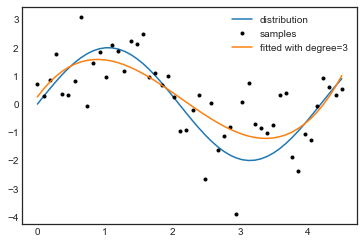

In [7]:
n_degrees = 3
model = fit_polynomial(x, y, n_degrees)
y_pred = apply_polynomial(model, x)

plt.figure()
pl.plot(x_ideal, y_ideal, label='distribution')
plt.plot(x, y, 'k.', label='samples')
plt.plot(x, y_pred, label='fitted with degree={}'.format(n_degrees))
plt.legend()
plt.show()

## Model averaging

The following code generates a set of samples of the same size and fits a poynomial to each sample. Then the average model is calculated. All the models, including the average model, are plotted.

Try the model fitting for different degree of polynomial by changing $degree$, and see how much each fitted models vary

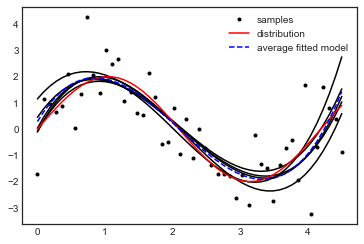

In [8]:
degree = 3
n_samples = 50
n_models = 5

y_avg = np.zeros(n_samples)
for i in range(n_models):
    x, y = sample(n_samples)
    model = fit_polynomial(x, y, degree)
    y_pred = apply_polynomial(model, x)
    y_avg = y_avg + y_pred
    plt.plot(x, y_pred, 'k-')
y_avg = y_avg / n_models

plt.plot(x, y, 'k.', label = 'samples')
plt.plot(x_ideal, y_ideal, 'r', label='distribution')
plt.plot(x, y_avg, 'b--', label = 'average fitted model')
plt.legend()
plt.show()

## Bias Variance Tradeoff

Same as previous example, we generate several samples and fit a polynomial to each one. We calculate bias an variance among models for different polynomial degrees. Bias, variance and error are plotted against different degree values.

In [9]:
n_samples = 20
x_test, y_test = sample(n_samples)
x_ideal, y_ideal = f(n_samples)

n_models = 100
max_degree = 15

bias_vals = []
var_vals =[]
sum_of_bias_var_vals = []
mse_vals = []
train_mse_vals = []

for degree in range(1, max_degree):
    y_avg = np.zeros(n_samples)
    y_preds = []
    train_mse = 0
    for i in range(n_models):
        x, y = sample(n_samples)
        model = fit_polynomial(x, y, degree)
        y_pred = apply_polynomial(model, x)
        y_avg = y_avg + y_pred
        y_preds.append(y_pred)
        train_mse += norm(y_pred - y)
    y_avg = y_avg / n_models
    train_mse /= n_models*y_avg.size
    train_mse_vals.append(train_mse)
    
    bias = y_avg - y_ideal
    variance = 0
    for y_pred in y_preds:
        variance += np.square(y_avg - y_pred)
    variance /= n_models
    mse_avg = 0
    for y_pred in y_preds:
        mse_avg += np.square(y_pred - y_test)
    mse_avg /= n_models
    
    bias_vals.append(np.mean(np.square(bias)))
    var_vals.append(np.mean(variance))
    sum_of_bias_var_vals.append(np.mean(np.square(bias) + variance))
    mse_vals.append(np.mean(mse_avg))

plt.plot(range(1, max_degree), bias_vals, label='bias^2')
plt.plot(range(1, max_degree), var_vals, label='variance')
plt.plot(range(1, max_degree), sum_of_bias_var_vals, label='bias^2 + variance')
# plt.plot(range(1, max_degree), mse_vals, label='test error')
# plt.plot(range(1, max_degree), train_mse_vals, label='train error')
plt.legend()
plt.xlabel('Degree of polynomial')
plt.ylabel('Error')
plt.show()

ValueError: illegal value in 4-th argument of internal None

## Repeat from [Data Generation](#Data-Generation)

In [9]:
## Repeat with 2, 3 functions


# 2. K Nearest Neighbor Classification

https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/

## Import Necessary Libraries

In [10]:
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Part 1: Human Activity Recognition dataset

We are first going to use a simple Human Activity Recognition (HAR) dataset to implement KNN from scratch.  

### Load dataset

The dataset contains the average (mean) and standard deviation of the accelerometer values recorded while the participant was performing 3 different actions (standing, walking, and running).

In [11]:
dataset = pd.read_csv('Data/HAR-simple.csv', names=['mean', 'std', 'class'])
dataset.head()

,mean,std,class
0,21.102907,5.765471,running
1,21.021069,6.140544,running
2,21.183245,5.867254,running
3,21.053389,5.808249,running
4,20.079922,6.108489,running


In [12]:
# dataset.iloc[:, :-1].values

### Visualize

Plot the data samples to see how the (mean, std) values differ for different activities

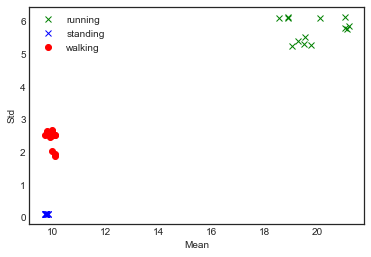

In [13]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 2].values

plt.figure()
for x_sample, y_sample in zip(X, y):
    if y_sample == 'walking':
        plt.plot(x_sample[0], x_sample[1], 'ro', label=y_sample)
    elif y_sample == 'running':
        plt.plot(x_sample[0], x_sample[1], 'gx', label=y_sample)
    elif y_sample == 'standing':
        plt.plot(x_sample[0], x_sample[1], 'bx', label=y_sample)
    else:
        raise ValueError('Wrong label: {}'.format(y_sample))
        
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.xlabel('Mean')
plt.ylabel('Std')
plt.show()

### Find K nearest neighbors

Use the first 30 samples (10 samples per each activity) as training set, and the last 10 samples as testset. Randomly pick a test sample, find K nearest neighbors, and predict the label. 

[29 23 26 27 25]
['walking' 'walking' 'walking' 'walking' 'walking']
Test sample idx:  0 , Ground truth:  walking , predicted:  walking


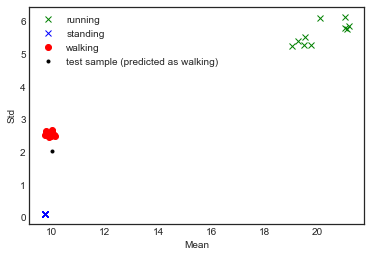

In [14]:
# Split the dataset into train and testset
X_train = X[0:30]
X_test = X[30:]
y_train = y[0:30]
y_test = y[30:]

# Randomly pick a test sample
idx = np.random.randint(10)
x_sample = X_test[idx]
y_sample = y_test[idx]

# Calculate distances with each training samples
distance = [np.sum(np.abs(x - x_sample)) for x in X_train]
    
# Find K nearest neighbors
K = 5
neighbors_idx = np.argsort(distance)[:K]
print(neighbors_idx)
y_neighbors = y_train[neighbors_idx]
print(y_neighbors)

# Choose most common one
y_pred = Counter(y_neighbors).most_common()[0][0]

# Compare with ground truth
print('Test sample idx: ', idx, ', Ground truth: ', y_test[idx], ', predicted: ', y_pred)

# Visualize
plt.figure()
for i in range(X_train.shape[0]):
    if y[i]=='walking':
        plt.plot(X_train[i][0], X_train[i][1], 'ro', label = 'walking')
    elif y[i]=='running':
        plt.plot(X_train[i][0], X_train[i][1], 'gx', label = 'running')
    else:
        plt.plot(X_train[i][0], X_train[i][1], 'bx', label = 'standing')
        
plt.plot(X_test[idx][0], X_test[idx][1], 'k.', label = 'test sample (predicted as {})'.format(y_pred))
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.xlabel('Mean')
plt.ylabel('Std')
plt.show()

In [15]:
print(distance)

[14.8431293964386, 15.136364221572878, 15.025249719619753, 14.83638834953308, 14.163161516189577, 13.038892030715944, 12.741111040115355, 12.269019842147825, 12.619485139846804, 12.983118772506716, 2.17248973995447, 2.1746509075164777, 2.184240832924841, 2.1785385012626612, 2.1808096766471863, 2.1856870204210264, 2.189821019768713, 2.1787251755595207, 2.181386969983576, 2.1624409183859825, 0.829068183898924, 0.7751250267028795, 0.7885472774505597, 0.5494894981384264, 0.647965192794798, 0.6038873195648211, 0.5701789855957053, 0.5947182178497328, 0.6244347095489484, 0.5024325847625715]


In [16]:
neighbors_idx

array([29, 23, 26, 27, 25], dtype=int64)

## Part 2: IRIS dataset


Next, we are going to use the famous iris data set for our KNN example. The dataset consists of four attributes: sepal-width, sepal-length, petal-width and petal-length. These are the attributes of specific types of iris plant. The task is to predict the class to which these plants belong. There are three classes in the dataset: Iris-setosa, Iris-versicolor and Iris-virginica. Further details of the dataset are available here.

![Iris dataset](iris.jpg)

In [17]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Preprocessing

The next step is to split our dataset into its attributes and labels. To do so, use the following code:

In [18]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

## Train Test Split

To avoid over-fitting, we will divide our dataset into training and test splits, which gives us a better idea as to how our algorithm performed during the testing phase. This way our algorithm is tested on un-seen data, as it would be in a production application.

To create training and test splits, execute the following script:

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

## Feature Scaling

Before making any actual predictions, it is always a good practice to scale the features so that all of them can be uniformly evaluated. Wikipedia explains the reasoning pretty well:

Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. For example, the majority of classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.

The gradient descent algorithm (which is used in neural network training and other machine learning algorithms) also converges faster with normalized features.

The following script performs feature scaling:

In [20]:
scaler = StandardScaler()
scaler.fit(X_train)

print('Before scaling, X_train range {:.4f} - {:.4f}'.format(np.min(X_train), np.max(X_train)))
X_train = scaler.transform(X_train)
print('After scaling, X_train range {:.4f} - {:.4f}'.format(np.min(X_train), np.max(X_train)))
print('Before scaling, X_test range {:.4f} - {:.4f}'.format(np.min(X_test), np.max(X_test)))
X_test = scaler.transform(X_test)
print('After scaling, X_test range {:.4f} - {:.4f}'.format(np.min(X_test), np.max(X_test)))

Before scaling, X_train range 0.1000 - 7.9000
After scaling, X_train range -2.3626 - 3.0634
Before scaling, X_test range 0.1000 - 7.2000
After scaling, X_test range -1.4769 - 1.7069


# Training
It is extremely straight forward to train the KNN algorithm and make predictions with it, especially when using Scikit-Learn.

The first step is to import the KNeighborsClassifier class from the sklearn.neighbors library. In the second line, this class is initialized with one parameter, i.e. n_neigbours. This is basically the value for the K. There is no ideal value for K and it is selected after testing and evaluation, however to start out, 5 seems to be the most commonly used value for KNN algorithm.

In [21]:
cls = KNeighborsClassifier(n_neighbors=5)
cls.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Prediction
The final step is to make predictions on our test data. To do so, execute the following script:

In [22]:
y_pred = cls.predict(X_test)

## Evaluating the Algorithm

For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. Take a look at the following script:

In [23]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



## Comparing Error Rate with the K Value

In the training and prediction section we said that there is no way to know beforehand which value of K that yields the best results in the first go. We randomly chose 5 as the K value and it just happen to result in 100% accuracy.

One way to help you find the best value of K is to plot the graph of K value and the corresponding error rate for the dataset.

In this section, we will plot the mean error for the predicted values of test set for all the K values between 1 and 40.

To do so, let's first calculate the mean of error for all the predicted values where K ranges from 1 and 40. Execute the following script:

In [24]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

# Plot Error Rates

The final step is to plot the error values against K values. Execute the following script to create the plot:

From the output we can see that the mean error is zero when the value of the K is between 5 and 18. I would advise you to play around with the value of K to see how it impacts the accuracy of the predictions.

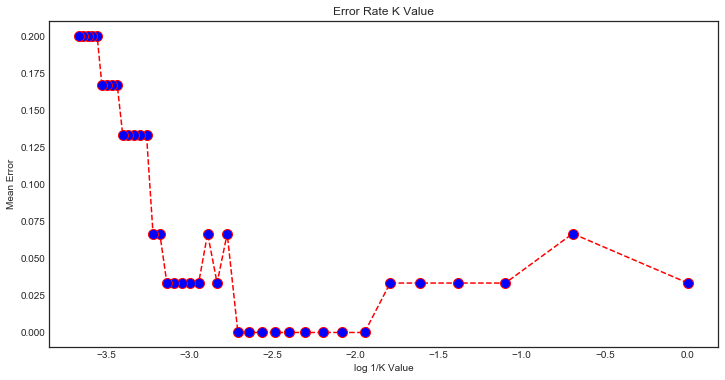

In [25]:
plt.figure(figsize=(12, 6))
plt.plot([np.log(1/k) for k in range(1, 40)], error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('log 1/K Value')
plt.ylabel('Mean Error')
plt.show()